In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# --------------------------------------------------------------------
#
# A continuacion se desarrolla la obtencion de los valores de Ganancia
# Normalizada y Error Vectorial Normalizado
#
# Los calculos a continuacion desarrollados se hicieron partiendo del
# Circuito 1.1, con Ri = 50 [Ω] y utilizando el opAmp LM324
#
# --------------------------------------------------------------------

# 1. Definición de constantes
f_H = 16400000  # Valor calculado
w_H = 2 * np.pi * f_H

# 2. Generación del vector de prueba (0.1 f_H hasta 1.0 f_H)
factores = np.arange(0, 1.1, 0.1) # Array: [0, 0.1, 0.2, ..., 1.0]

# Calculamos los arrays de frecuencia f y omega para cada paso
f_values = factores * f_H
w_values = factores * w_H

print(f"Frecuencia de corte w_H: {w_H:.2e} rad/s")

Frecuencia de corte w_H: 1.03e+08 rad/s


In [14]:
# Relación w / w_H
ratio = w_values / w_H

# 1. Cálculo de Ganancia Normalizada (a_vf)
mod_avf = 1 / np.sqrt(ratio**2 + 1)
fase_avf = -np.arctan(ratio) # Resultado en radianes

# 2. Cálculo de Error Vectorial (ε_v)
# Nota: Implementado estrictamente según la fórmula de la imagen proporcionada
mod_err = 1 - (1 / np.sqrt(ratio**2 + 1))
fase_err = -np.arctan(ratio) + (np.pi / 2)

# 3. Creación del DataFrame (Tabla)
df_resultados = pd.DataFrame({
    'Frecuencia [Hz]': f_values,
    'Omega [rad/s]': w_values,
    'Modulo (Ganancia)': mod_avf,
    'Fase (Ganancia) [rad]': fase_avf,
    'Modulo (Error)': mod_err,
    'Fase (Error) [rad]': fase_err
})

# Visualización de la tabla
# Formateamos para mostrar notación científica o decimales ordenados
pd.set_option('display.float_format', '{:.4e}'.format)
display(df_resultados)

,Frecuencia [Hz],Omega [rad/s],Modulo (Ganancia),Fase (Ganancia) [rad],Modulo (Error),Fase (Error) [rad]
0,0.0000e+00,0.0000e+00,1.0000e+00,-0.0000e+00,0.0000e+00,1.5708e+00
1,1.6400e+06,1.0304e+07,9.9504e-01,-9.9669e-02,4.9628e-03,1.4711e+00
2,3.2800e+06,2.0609e+07,9.8058e-01,-1.9740e-01,1.9419e-02,1.3734e+00
3,4.9200e+06,3.0913e+07,9.5783e-01,-2.9146e-01,4.2174e-02,1.2793e+00
4,6.5600e+06,4.1218e+07,9.2848e-01,-3.8051e-01,7.1523e-02,1.1903e+00
5,8.2000e+06,5.1522e+07,8.9443e-01,-4.6365e-01,1.0557e-01,1.1071e+00
6,9.8400e+06,6.1827e+07,8.5749e-01,-5.4042e-01,1.4251e-01,1.0304e+00
7,1.1480e+07,7.2131e+07,8.1923e-01,-6.1073e-01,1.8077e-01,9.6007e-01
8,1.3120e+07,8.2435e+07,7.8087e-01,-6.7474e-01,2.1913e-01,8.9606e-01
9,1.4760e+07,9.2740e+07,7.4329e-01,-7.3282e-01,2.5671e-01,8.3798e-01


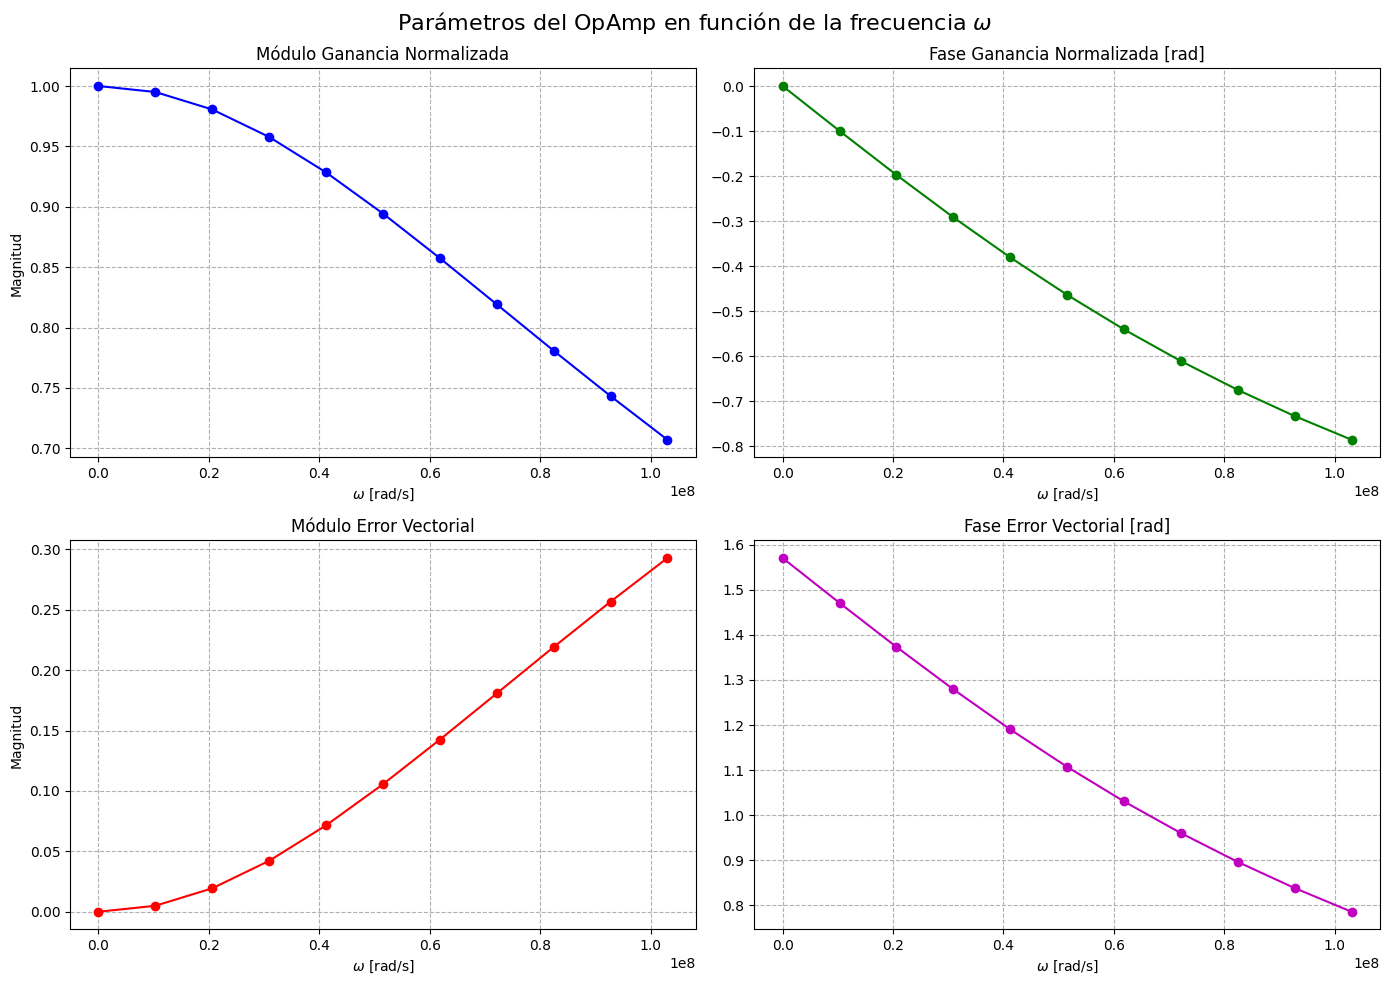

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(r'Parámetros del OpAmp en función de la frecuencia $\omega$', fontsize=16)

# Gráfico 1: Módulo Ganancia
axs[0, 0].plot(w_values, mod_avf, 'b-o', label='|avf|')
axs[0, 0].set_title('Módulo Ganancia Normalizada')
axs[0, 0].set_ylabel('Magnitud')
axs[0, 0].set_xlabel(r'$\omega$ [rad/s]')
axs[0, 0].grid(True, which='both', linestyle='--')

# Gráfico 2: Fase Ganancia
axs[0, 1].plot(w_values, fase_avf, 'g-o', label='Phase avf')
axs[0, 1].set_title('Fase Ganancia Normalizada [rad]')
axs[0, 1].set_xlabel(r'$\omega$ [rad/s]')
axs[0, 1].grid(True, which='both', linestyle='--')

# Gráfico 3: Módulo Error
axs[1, 0].plot(w_values, mod_err, 'r-o', label='|eV|')
axs[1, 0].set_title('Módulo Error Vectorial')
axs[1, 0].set_ylabel('Magnitud')
axs[1, 0].set_xlabel(r'$\omega$ [rad/s]')
axs[1, 0].grid(True, which='both', linestyle='--')

# Gráfico 4: Fase Error
axs[1, 1].plot(w_values, fase_err, 'm-o', label='Phase eV')
axs[1, 1].set_title('Fase Error Vectorial [rad]')
axs[1, 1].set_xlabel(r'$\omega$ [rad/s]')
axs[1, 1].grid(True, which='both', linestyle='--')

plt.tight_layout()
plt.show()

In [16]:
nombre_archivo = 'tabla_errores_normalizados.csv'
df_resultados.to_csv(nombre_archivo, index=False)

print(f"Archivo '{nombre_archivo}' generado exitosamente.")
from google.colab import files
# Descomentar la siguiente línea para que se descargue automáticamente a tu PC
# files.download(nombre_archivo)

Archivo 'tabla_errores_normalizados.csv' generado exitosamente.
